In [1]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score 
import csv
import os
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

reading data

In [2]:
X_train = np.loadtxt('./data/data_matrices/credit_train.data', delimiter = ' ')
y_train = np.loadtxt('./data/data_matrices/credit_train.solution')
y_val = np.loadtxt('./data/data_matrices/credit_valid.solution')
y_test = np.loadtxt('./data/data_matrices/credit_test.solution')
X_val = np.loadtxt('./data/data_matrices/credit_valid.data', delimiter = ' ')
X_test = np.loadtxt('./data/data_matrices/credit_test.data', delimiter = ' ')

displaying shapes

building model

In [3]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
print ("AUC score on the validation set = %.5f" % roc_auc_score(y_val , clf.predict(X_val)))
print ("AUC score on the test set = %.5f " % roc_auc_score(y_test , clf.predict(X_test)))

AUC score on the validation set = 0.74157
AUC score on the test set = 0.72834 


C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [4]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)
print ("Training data shape : ", X_train.shape, y_train.shape)
print ("Validation data shape : ", X_val.shape, y_val.shape )
print ("Test data shape : ", X_test.shape, y_test.shape )

Training data shape :  (121500, 56) (121500, 1)
Validation data shape :  (15000, 56) (15000, 1)
Test data shape :  (13500, 56) (13500, 1)


Exploratory analysis:
-------------
o	multiclass/multilabel: represent the matrix of correlation of class labels or target valus as a heat map.

o	univariate distributions: for each variable, plot the histogram of labels/target values.

o	multiclass/multilabel: show the scatter plots of all pairs of features and the histograms on the diagonal.

o	multiclass/multilabel: perform PCA or t-sne and project the data in 2 dimensions. Show a scatter plot and color code the labels of the classes.

o	univariate analysis: show a bar gray with the value of the chose metric using each feature as the classification prediction (oriented properly) or build a linear predictor with just one feature and show its prediction accuracy (OK to do this on training data as exploratory analysis).

o	large matrices: represent the data matrix as a heat map, preferably after 2-way hierarchical clustering.

o	images: do PCA and show the first few principal components.

In [5]:
trainset = np.concatenate((X_train, y_train), axis=1)
testset = np.concatenate((X_test, y_test), axis=1)
validset = np.concatenate((X_val, y_val), axis=1)
feat = []
for i in range (1, 57):
    feat.append("f"+str(i))
feat.append("target")

In [6]:
with open("train.csv","w") as train:
    train_writer = csv.DictWriter(train, fieldnames=feat)
    train_writer.writeheader()
    for i in range(trainset.shape[0]):
        dico = dict([(cle, val) for (cle, val) in zip(feat, trainset[i].tolist())])
        train_writer.writerow(dico)
        
with open("test.csv","w") as test:
    test_writer = csv.DictWriter(test, fieldnames=feat)
    test_writer.writeheader()
    for i in range(testset.shape[0]):
        dico = dict([(cle, val) for (cle, val) in zip(feat, testset[i].tolist())])
        test_writer.writerow(dico)
               
with open("valid.csv","w") as valid:
    val_writer = csv.DictWriter(valid, fieldnames=feat)
    val_writer.writeheader()
    for i in range(validset.shape[0]):
        dico = dict([(cle, val) for (cle, val) in zip(feat, validset[i].tolist())])
        val_writer.writerow(dico)

In [7]:
path = os.getcwd()
from IPython.display import display, HTML

def read_data(csvfile):
    df = pd.read_csv(csvfile)
    return df

file = os.path.join(path, "train.csv")
df = read_data(file)
pd.set_option('display.max_columns', 100)
display(df.head())

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,target
0,1.0,-0.020273,-0.900039,-0.100419,-0.172923,-0.032463,0.300672,-0.063793,-0.016145,-0.057852,-0.666126,0.018247,0.002036,0.003506,0.000658,-0.006096,0.001293,0.000327,0.001173,0.013504,0.090381,0.155637,0.029218,-0.270617,0.057417,0.014531,0.052069,0.599539,0.017365,0.003260,-0.030193,0.006406,0.001621,0.005809,0.066892,0.005614,-0.051993,0.011031,0.002792,0.010004,0.115188,-0.009761,0.002071,0.000524,0.001878,0.021624,-0.019181,-0.004854,-0.017395,-0.200286,0.001030,0.003691,0.042494,0.000934,0.010755,0.038537,1.0
1,1.0,-0.022042,2.281696,-0.100419,-0.172985,-0.015085,1.272313,-0.063793,0.868993,-0.057852,-0.666126,-0.050294,0.002213,0.003813,0.000333,-0.028045,0.001406,-0.019155,0.001275,0.014683,-0.229126,-0.394699,-0.034420,2.903032,-0.145557,1.982778,-0.132002,-1.519897,0.017371,0.001515,-0.127764,0.006406,-0.087263,0.005809,0.066892,0.002610,-0.220091,0.011035,-0.150323,0.010008,0.115230,-0.019193,0.000962,-0.013109,0.000873,0.010049,-0.081165,1.105632,-0.073606,-0.847521,-0.055436,0.003691,0.042494,-0.050273,-0.578859,0.038537,0.0
2,1.0,-0.022805,-0.426163,-0.100419,-0.173137,0.455111,0.689329,-0.063793,-0.016145,-0.057852,-0.666126,0.009718,0.002290,0.003948,-0.010379,-0.015720,0.001455,0.000368,0.001319,0.015191,0.042795,0.073784,-0.193952,-0.293767,0.027186,0.006880,0.024655,0.283878,0.017386,-0.045702,-0.069222,0.006406,0.001621,0.005809,0.066892,-0.078796,-0.119348,0.011045,0.002795,0.010016,0.115331,0.313721,-0.029033,-0.007348,-0.026329,-0.303161,-0.043975,-0.011129,-0.039879,-0.459180,0.001030,0.003691,0.042494,0.000934,0.010755,0.038537,0.0
3,1.0,-0.021422,-0.358467,-0.100419,-0.173024,0.008653,0.106344,-0.063793,1.754131,-0.057852,0.237202,0.007679,0.002151,0.003706,-0.000185,-0.002278,0.001367,-0.037576,0.001239,-0.005081,0.035997,0.062023,-0.003102,-0.038121,0.022868,-0.628798,0.020738,-0.085029,0.017375,-0.000869,-0.010679,0.006406,-0.176148,0.005809,-0.023820,-0.001497,-0.018400,0.011038,-0.303507,0.010010,-0.041042,0.000920,-0.000552,0.015179,-0.000501,0.002053,-0.006784,0.186542,-0.006152,0.025225,-0.111902,0.003691,-0.015132,-0.101481,0.416083,-0.013723,0.0
4,1.0,-0.024218,0.453891,0.138087,-0.173118,-0.082422,0.495001,-0.063793,-0.016145,-0.057852,-0.666126,-0.010992,-0.003344,0.004192,0.001996,-0.011988,0.001545,0.000391,0.001401,0.016132,0.062676,-0.078576,-0.037411,0.224676,-0.028955,-0.007328,-0.026259,-0.302349,-0.023905,-0.011381,0.068353,-0.008809,-0.002229,-0.007989,-0.091983,0.014269,-0.085693,0.011044,0.002795,0.010015,0.115318,-0.040799,0.005258,0.001331,0.004768,0.054904,-0.031578,-0.007992,-0.028637,-0.329733,0.001030,0.003691,0.042494,0.000934,0.010755,0.038537,0.0


Summary statistics
--------------------

In [8]:
#summary statistics of our data
summary = df.describe()
display(summary)
#count the number of unique levels for each feature as well as for Target 
nb_levels = pd.DataFrame()
cols = df.columns
for j in range(df.shape[1]):
    l = df[cols[j]].unique()
    nb_levels[cols[j]] = pd.Series(len(l))


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,target
count,121500.0,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000,121500.000000
mean,1.0,-0.000420,-0.000159,0.001530,0.000195,-0.001345,0.000628,0.001481,0.000050,0.001412,0.001444,-0.005305,-0.001285,0.001418,0.006913,-0.012220,-0.001007,0.004524,-0.001086,0.001126,-0.062598,0.024095,0.027873,0.147986,-0.060645,0.033314,-0.056879,-0.216879,-0.006727,-0.008720,-0.057703,1.015511,-0.031811,1.019054,-0.003705,-0.017649,0.049038,-0.008485,0.122907,-0.007729,-0.044545,0.087177,-0.010761,0.115798,-0.009604,0.066412,-0.082273,0.433671,-0.073431,0.073092,-0.046395,1.025075,-0.011238,-0.041060,0.130163,-0.012037,0.066840
std,0.0,1.029705,1.000602,1.015782,1.062601,1.037376,1.000194,1.015963,1.000110,1.016076,1.000055,0.683015,0.122476,0.451367,1.481943,0.652764,0.083876,0.755427,0.064716,0.968172,1.498070,0.849714,0.642614,0.970320,1.505747,0.923258,1.509245,0.802927,0.233224,0.313896,1.652374,23.438541,0.926757,23.524375,0.839543,0.213328,1.045012,0.190127,2.553792,0.186419,0.903553,0.977080,0.297496,1.642103,0.297236,1.601053,1.657664,2.173188,1.661535,0.970534,0.919278,23.694498,0.835900,0.916402,1.031167,0.833140,0.249745
min,1.0,-0.024218,-3.540201,-0.100419,-0.173228,-0.497927,-1.642610,-0.063793,-0.901283,-0.057852,-0.666126,-85.988157,-20.385765,-35.144330,-16.706472,-118.921898,-12.950523,-74.006536,-11.744467,-135.228335,-49.305955,-111.866927,-67.684701,-8.477698,-49.662390,-17.115961,-49.844249,-14.483114,-16.227735,-23.388888,-38.228723,-0.403046,-20.975709,-0.173567,-15.502861,-40.346785,-76.271615,-10.309039,-44.655665,-9.348980,-107.646171,-42.178129,-14.858325,-57.936547,-13.474600,-92.378744,-38.505081,-8.327647,-38.646083,-11.737611,-21.127343,-0.232199,-15.614932,-21.204709,-31.238763,-15.672113,0.000000
25%,1.0,-0.024099,-0.764646,-0.100419,-0.173142,-0.194910,-0.670969,-0.063793,-0.901283,-0.057852,-0.666126,-0.015910,0.002069,0.003502,-0.001713,-0.011892,0.001391,-0.018369,0.001260,-0.005725,-0.086367,-0.125383,-0.083999,-0.250262,-0.050548,-0.287057,-0.045841,-0.663104,-0.012073,-0.013764,-0.049707,0.006406,-0.087263,0.005809,-0.091983,-0.038853,-0.119174,0.011001,-0.078281,0.009982,-0.197325,-0.039038,-0.007827,-0.003167,-0.006685,-0.051779,-0.043975,-0.011129,-0.039879,-0.321985,-0.055436,0.003691,-0.015132,-0.050273,-0.062166,-0.013723,0.000000
50%,1.0,-0.023602,-0.019984,-0.100419,-0.173048,-0.079009,-0.087984,-0.063793,-0.016145,-0.057852,-0.666126,0.000477,0.002350,0.003971,0.001886,0.002128,0.001504,0.000387,0.001364,0.014166,-0.004791,0.015172,0.002061,0.049408,-0.003044,0.000323,-0.002760,-0.167065,0.017374,0.007934,0.008835,0.006406,0.001621,0.005809,0.066892,0.005619,0.015231,0.011039,0.002794,0.010011,0.086299,0.028138,0.005040,0.004131,0.004571,0.052630,0.005613,0.017108,0.005090,0.058608,0.001030,0.003691,0.042494,0.000934,0.010755,0.038537,0.000000
75%,1.0,-0.021983,0.724677,-0.100419,-0.172802,0.076146,0.495001,-0.063793,0.868993,-0.057852,0.237202,0.016825,0.002418,0.004155,0.004490,0.016153,0.001537,0.019957,0.001394,0.015957,0.069987,0.153145,0.112357,0.492755,0.04446

In [9]:
#distribution of levels for some features
#for feat in list(cols[1:2])+[cols[-1]]:
#    plt.figure()
#    sns.countplot(x=feat, data= df, order = df[feat].value_counts().index, palette="Greens_d")
#    plt.xticks(rotation=85, fontsize = 8)
#    plt.show()

In [10]:
class_dist = df.groupby('target').agg({'target':'count'}).apply(lambda x: 100 * x / float(x.sum())).sort_values(by='target', ascending=False)
class_dist['target'] =  pd.Series(["{0:.2f}%".format(val) for val in class_dist['target']], index = class_dist.index)
display(class_dist)

,target
target,
0.0,93.32%
1.0,6.68%


Features correlation
------------------

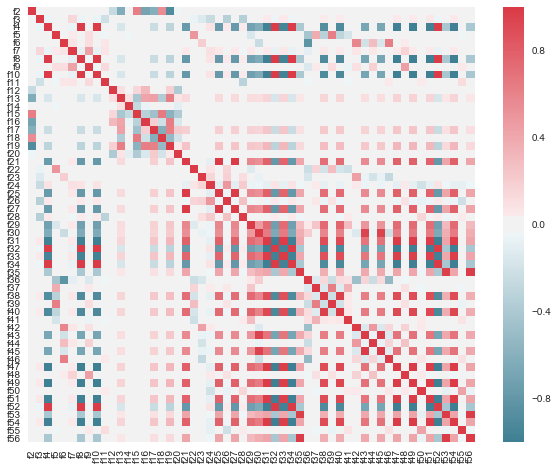

In [37]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df[cols[1:-1]].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=False, ax=ax)
plt.show()

In [36]:
#maximum correlation between features
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
oc = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print("Top 10 highest positive correlation coefficients between features")
max_corr_pos = oc.head(10)
display(max_corr_pos)
print("  ")
print("Top 5 highest negative correlation coefficients between features")
max_corr_neg = oc.tail(5)
display(max_corr_neg)

Top 10 highest positive correlation coefficients between features


f34  f52    0.999999
f32  f52    0.999998
     f34    0.999998
f25  f27    0.997168
f47  f49    0.997068
f10  f34    0.997001
     f52    0.996982
     f32    0.996962
f21  f27    0.995654
f49  f54    0.995422
dtype: float64

  
Top 5 highest negative correlation coefficients between features


f32  f47   -0.996969
f47  f52   -0.996969
f34  f49   -0.998513
f32  f49   -0.998523
f49  f52   -0.998530
dtype: float64

In [13]:
#seperate features and target
cols = df.columns
X = df[cols[1:-1]]
y = df[cols[-1]]
print(y.head(10))
#factorize y
y = pd.factorize(y)[0]
y = y+1
print(y[:10])

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: target, dtype: float64
[1 2 2 2 2 2 2 2 2 2]


In [14]:



pca = PCA()
pca.fit(X)
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.zeros(exp_var_ratio.shape)
for i in range(len(cumulative_var_ratio)):
    cumulative_var_ratio[i] = np.sum(exp_var_ratio[0:i+1])
exp_var_ratio = np.concatenate((exp_var_ratio.reshape(1,len(exp_var_ratio)), cumulative_var_ratio.reshape(1,len(cumulative_var_ratio))), axis=0)
pd.set_option('display.max_columns', 100)
display(pd.DataFrame(exp_var_ratio, columns = ['PC_'+str(i+1) for i in range(X.shape[1])], index = ['Proportion of variance', 'Cumulative proportion']))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55
Proportion of variance,0.9758,0.004497,0.003147,0.002058,0.001886,0.001546,0.001253,0.001064,0.000950,0.000836,0.000776,0.000721,0.000705,0.000659,0.000619,0.000434,0.000402,0.000344,0.000295,0.000282,0.000224,0.000212,0.000196,0.000185,0.000171,0.000159,0.000126,0.000085,0.000079,0.000071,0.000062,0.000035,0.000019,0.000017,0.000014,0.000011,0.000009,0.000007,0.000006,0.000005,0.000005,0.000004,0.000004,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000001,8.820779e-07,7.019624e-07,4.490189e-07,3.876855e-07,2.334448e-07
Cumulative proportion,0.9758,0.980297,0.983444,0.985502,0.987388,0.988934,0.990187,0.991251,0.992201,0.993036,0.993812,0.994534,0.995239,0.995898,0.996517,0.996951,0.997353,0.997697,0.997992,0.998274,0.998498,0.998709,0.998906,0.999091,0.999262,0.999421,0.999547,0.999633,0.999712,0.999783,0.999846,0.999881,0.999900,0.999917,0.999930,0.999941,0.999951,0.999958,0.999964,0.999969,0.999974,0.999978,0.999982,0.999985,0.999988,0.999991,0.999993,0.999994,0.999996,0.999997,9.999982e-01,9.999989e-01,9.999994e-01,9.999998e-01,1.000000e+00


In [32]:
def plot_class_dist(y, label):
    title = 'Classes distribution in train/test/dev'
    total = len(y)
    f = plt.figure()
    ax = sns.countplot(y, palette="Reds_d")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()

(121500,)
(15000,)
(13500,)


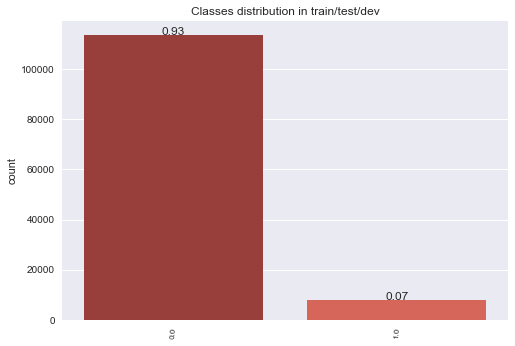

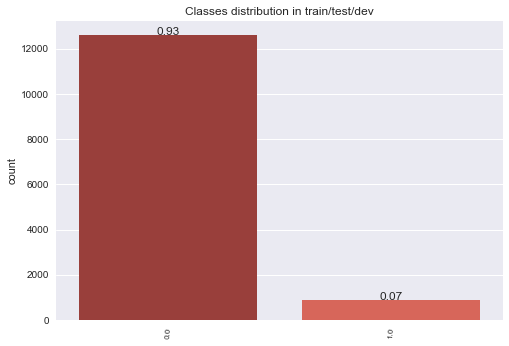

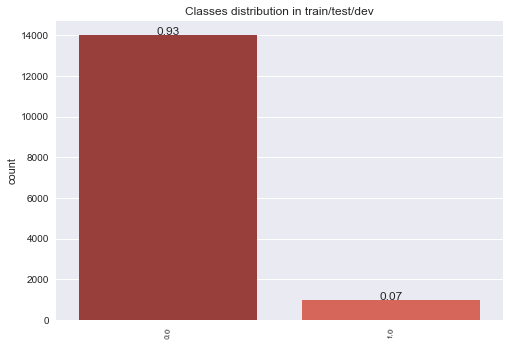

In [33]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_val=y_val.reshape(-1,)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

plot_class_dist(y_train, 'train')
plot_class_dist(y_test,'test')
plot_class_dist(y_val, 'val')
